In [182]:
import os
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# 파일경로 지정 및 데이터 셋 불러오기
BASE_ROOT = os.getcwd()
DATA_PATH = os.path.join(BASE_ROOT, "data.csv")
data = pd.read_csv(DATA_PATH)

In [184]:
# 데이터 셋 상위 5개 열
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [185]:
# diagnosis 데이터 변형 M = 악성(0) , B = 양성(1) 
data['diagnosis'].replace({'M' : '0', 'B' : '1'}, inplace= True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [186]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [187]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


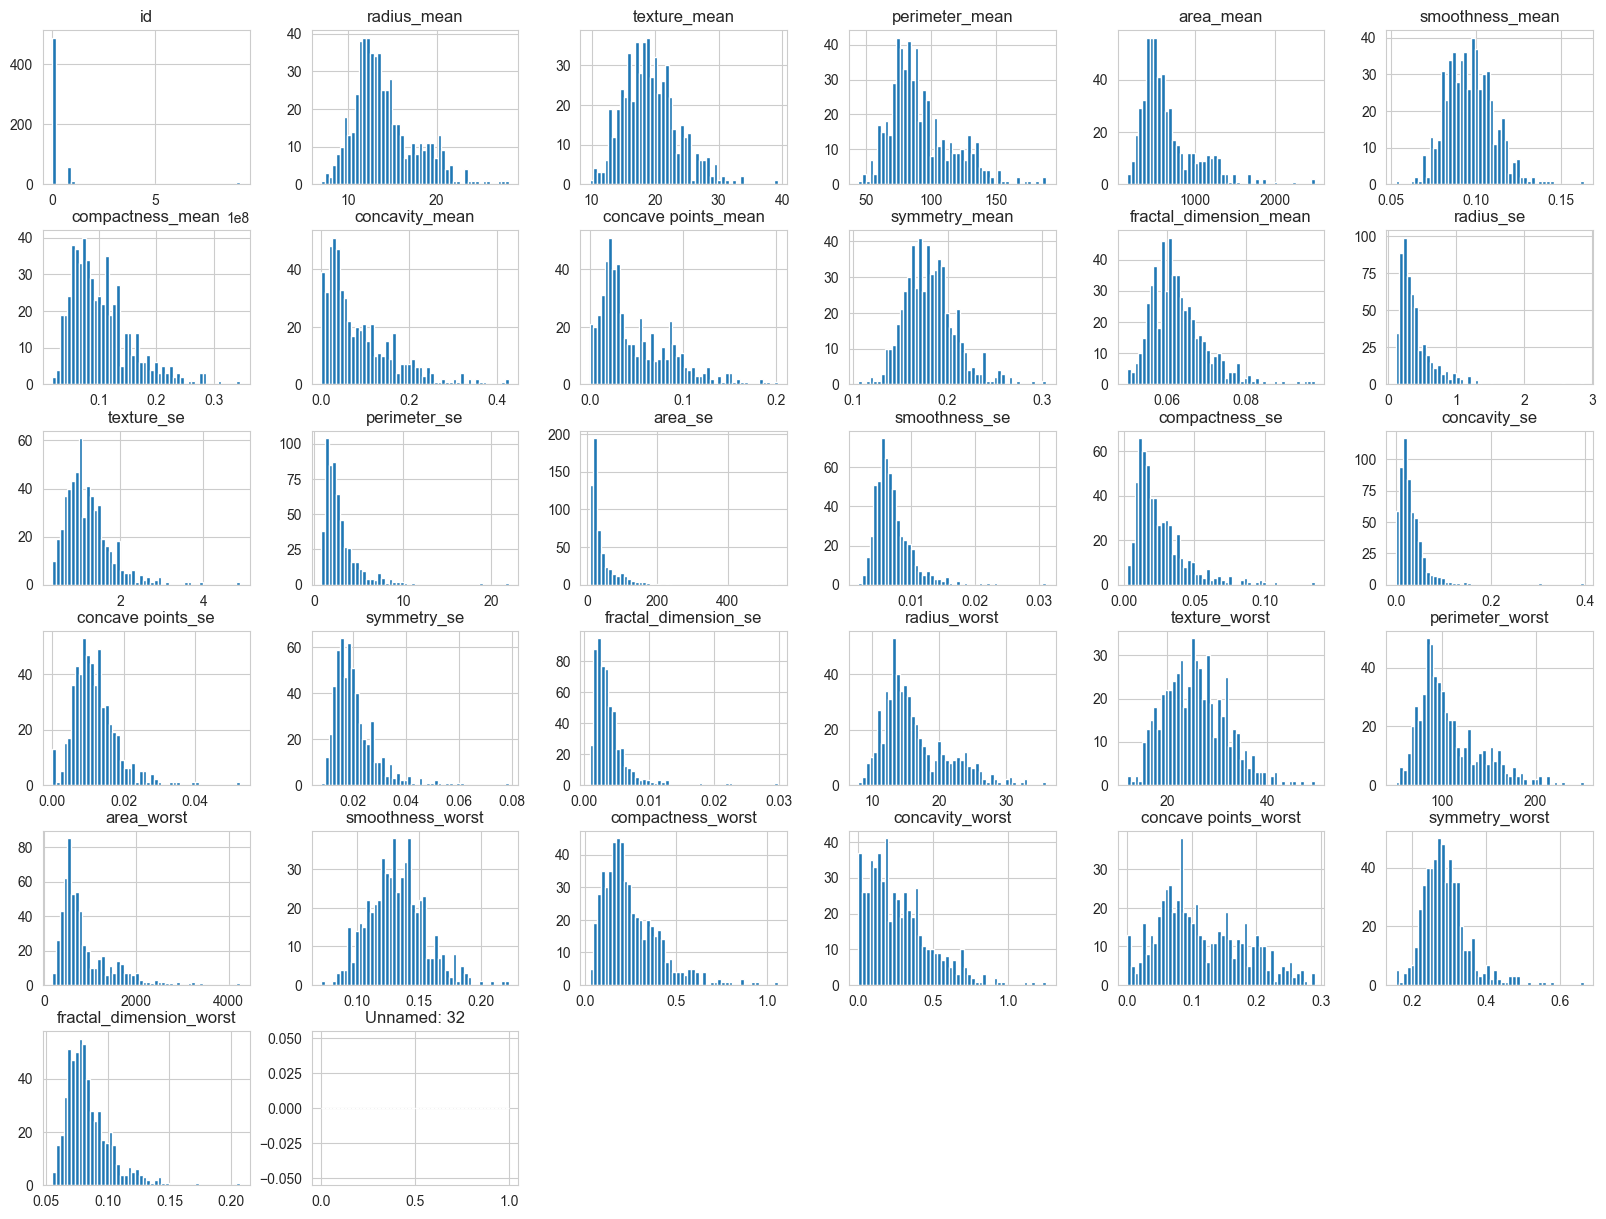

In [188]:
data.hist(bins=50, figsize = (20 ,15))
plt.show()

In [189]:
data["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(data , test_size=0.2 , random_state=42)

<Axes: >

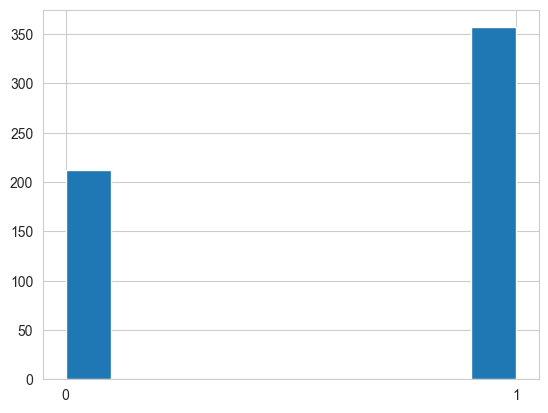

In [191]:
data["diagnosis"].hist()

<Axes: >

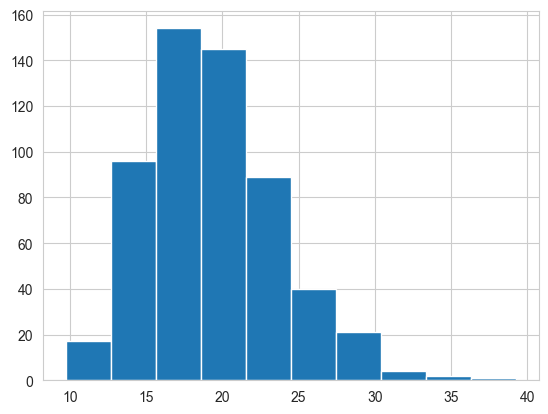

In [192]:
data["texture_mean"].hist()

In [193]:
data["radius_mean"].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

In [194]:
#결측치 제거 
pix_data = data.drop("Unnamed: 32", axis=1)
pix_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [195]:
corr_matrix = pix_data.corr()
corr_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,-0.039769,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,0.074626,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


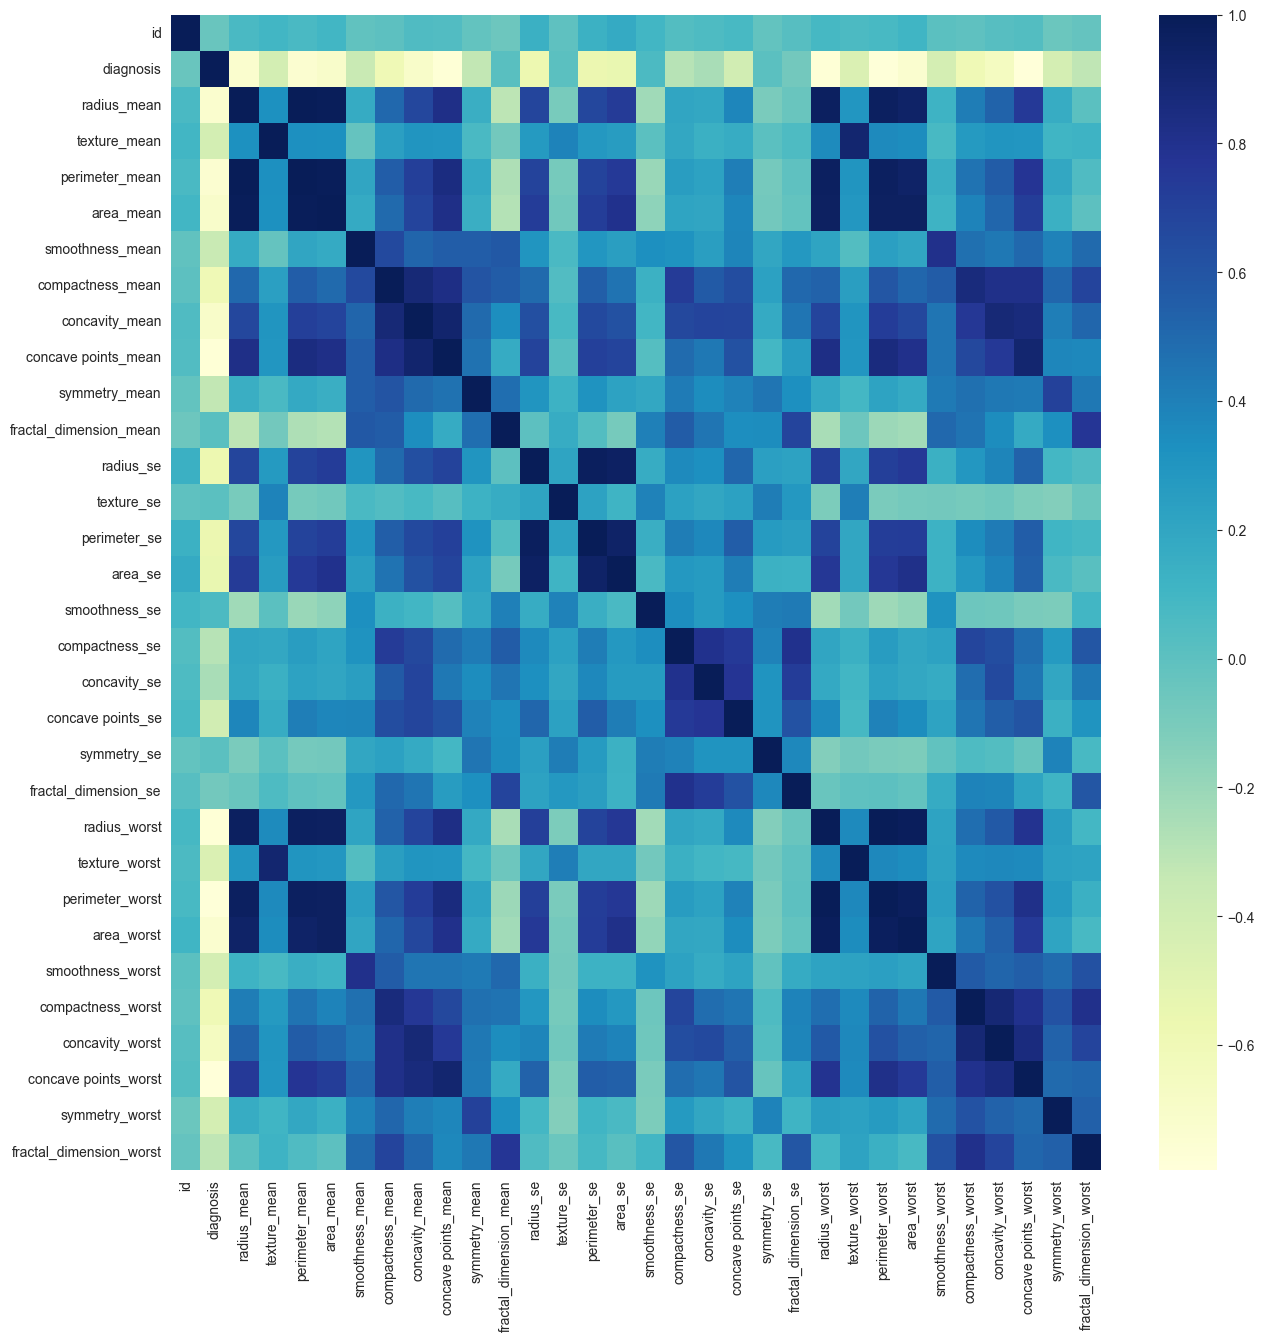

In [196]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [197]:
corr_matrix["radius_mean"].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
id                         0.074626
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0

array([[<Axes: xlabel='radius_mean', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='radius_mean'>,
        <Axes: xlabel='area_mean', ylabel='radius_mean'>,
        <Axes: xlabel='radius_worst', ylabel='radius_mean'>,
        <Axes: xlabel='perimeter_worst', ylabel='radius_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='area_mean', ylabel='perimeter_mean'>,
        <Axes: xlabel='radius_worst', ylabel='perimeter_mean'>,
        <Axes: xlabel='perimeter_worst', ylabel='perimeter_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='area_mean'>,
        <Axes: xlabel='perimeter_mean', ylabel='area_mean'>,
        <Axes: xlabel='area_mean', ylabel='area_mean'>,
        <Axes: xlabel='radius_worst', ylabel='area_mean'>,
        <Axes: xlabel='perimeter_worst', ylabel='area_mean'>],
       [<Axes: xlabel='radius_mean', ylabel='radius_worst'>,
        <Axes

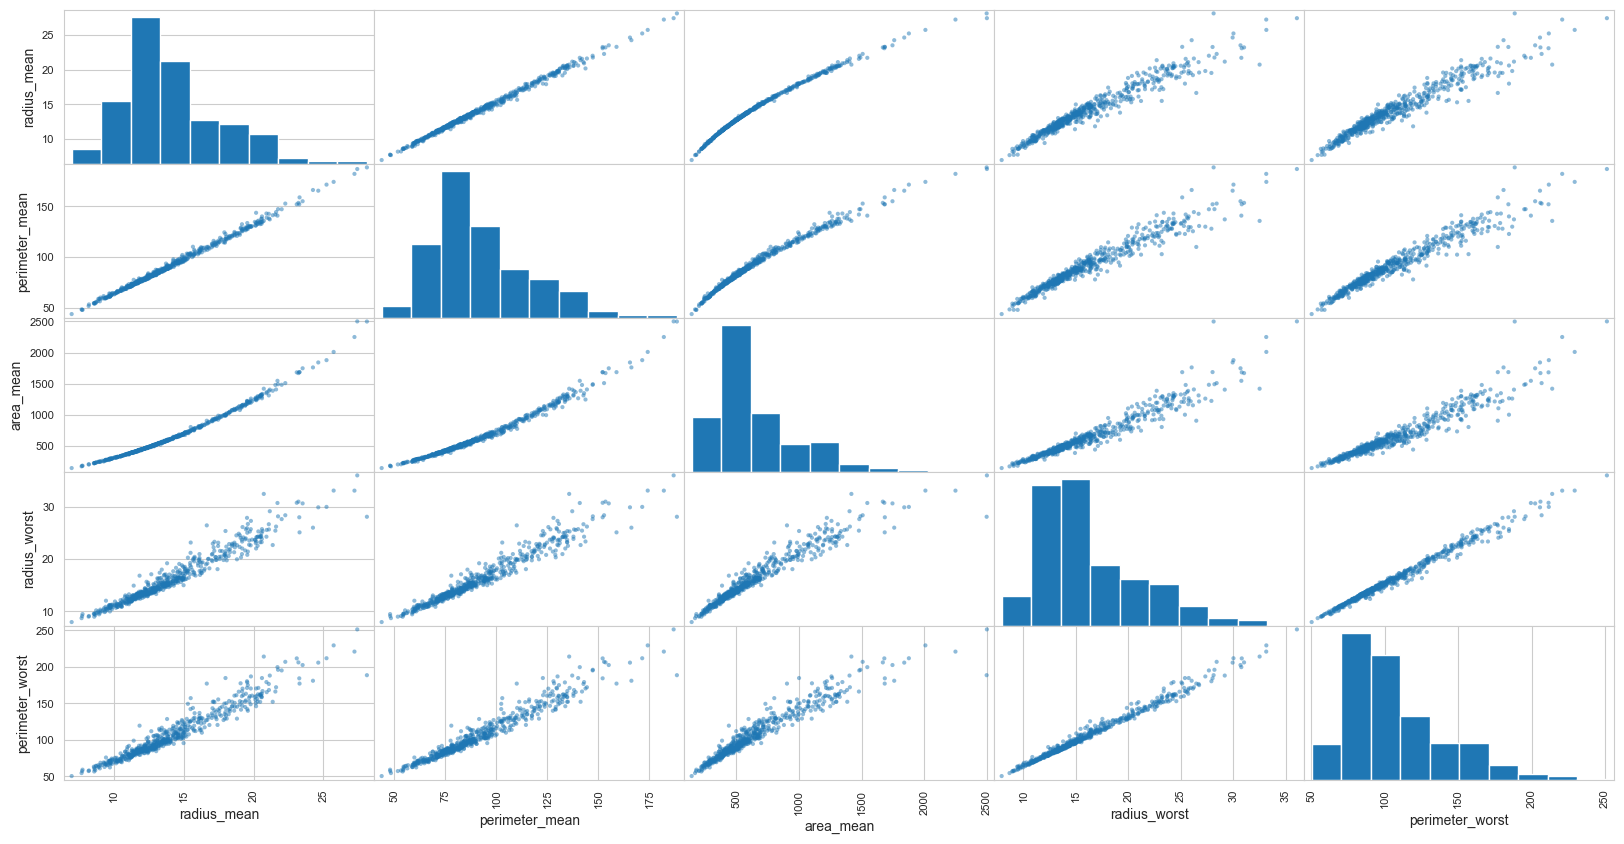

In [198]:
from pandas.plotting import scatter_matrix

attributes = ["radius_mean", "perimeter_mean" , "area_mean", "radius_worst", "perimeter_worst"]
#상위 5개 
scatter_matrix(pix_data[attributes], figsize=(20,10))


In [199]:
sample_null = pix_data[data.isnull().any(axis=1)].head()
sample_null

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [200]:
#상위 5개 peature에 대해 X_data 구성 
#양성, 음성 판단 데이터인 diagnosis를 Y_data로 구성
X_data = pix_data[attributes]
Y_data = data["diagnosis"]

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 학습용 데이터와 검증용 데이터 분리

X_train, X_test, y_train, y_test = train_test_split( X_data, Y_data ,test_size=0.2, random_state=42)


accuracy_list = []

k_range = range(3,101)
for i in k_range:
    # KNN 모델 생성
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # 모델 학습    
    knn.fit(X_train, y_train)

    # 검증용 데이터로 예측
    y_pred = knn.predict(X_test)
    
    # 모델 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print(f"KNN 모델의 정확도: {accuracy:.4f}")
    
best_accuracy = max(accuracy_list)
best_k = k_range[accuracy_list.index(best_accuracy)]

# 중복된 정확도 중 첫번째 k값 찾기
for i in range(accuracy_list.index(best_accuracy)):
    if accuracy_list[i] == best_accuracy:
        best_k = k_range[i]
        break
    
# 최고의 결과 출력
print(f"가장 높은 정확도 : {best_accuracy: .4f}")
print(f"해당 정확도의 k값: {best_k}")

KNN 모델의 정확도: 0.9737
KNN 모델의 정확도: 0.9825
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9737
KNN 모델의 정확도: 0.9737
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9211
KNN 모델의 정확도: 0.9298
KNN 모델의 정확도: 0.9211
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9298
KNN 모델의 정확도: 0.9298
KNN 모델의 정확도: 0.9298
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9386


In [202]:
print("실제 레이블: ", y_test[:10])
print("예측 레이블: ", y_pred[:10])


실제 레이블:  204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
Name: diagnosis, dtype: object
예측 레이블:  ['1' '0' '0' '1' '1' '0' '0' '0' '1' '1']


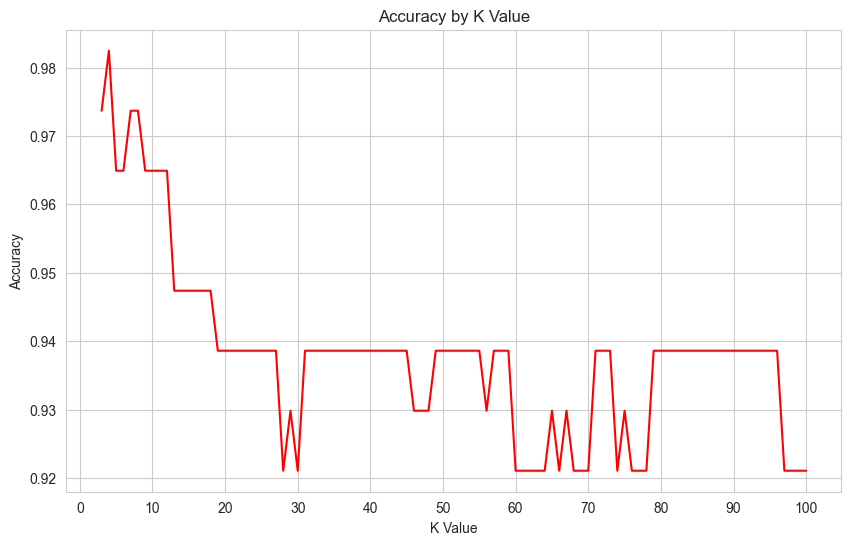

In [203]:
# k 값 별 정확도 시각화
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=accuracy_list, color="red")
plt.title("Accuracy by K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(range(0,101,10))
plt.show()


In [204]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 학습용 데이터와 검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# SVM 모델 생성
svm = SVC()

# 매개 변수 범위 지정
param_grid = {'C': np.arange(0, 500, 205),
              'gamma': np.arange(0.001, 10, 5)}

# GridSearchCV를 이용해 최적의 매개 변수 찾기
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 매개 변수 및 정확도 출력
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

svm = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm.fit(X_train, y_train)
# 검증용 데이터로 예측
y_pred = svm.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 모델의 정확도: {accuracy:.4f}")


Best parameters: {'C': 205, 'gamma': 0.001}
Best cross-validation score: 0.90
SVM 모델의 정확도: 0.9649


c:\github\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\github\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\github\tensorflow\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\github\tensorflow\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\github\tensorflow\lib\site-packages\sklearn\utils\_param_vali

In [205]:
print(pix_data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [206]:
pix_data.drop("diagnosis",axis=1,inplace=True)

In [207]:
print(pix_data.dtypes)

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [208]:
# Z-score를 통한 이상치 처리
# Z-Score 계산

z_scores = np.abs((pix_data - pix_data.mean()) / pix_data.std())

# 이상치 포함 여부 확인
outlier = z_scores > 5
outlier_cols = outlier.any()
pix_data = pix_data.loc[:, ~outlier_cols]
pix_data

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst
0,17.99,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,25.380,17.33,184.60,0.16220,0.7119,0.2654
1,20.57,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,24.990,23.41,158.80,0.12380,0.2416,0.1860
2,19.69,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,23.570,25.53,152.50,0.14440,0.4504,0.2430
3,11.42,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,14.910,26.50,98.87,0.20980,0.6869,0.2575
4,20.29,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,22.540,16.67,152.20,0.13740,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,25.450,26.40,166.10,0.14100,0.4107,0.2216
565,20.13,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,23.690,38.25,155.00,0.11660,0.3215,0.1628
566,16.60,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,18.980,34.12,126.70,0.11390,0.3403,0.1418
567,20.60,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,25.740,39.42,184.60,0.16500,0.9387,0.2650


In [209]:
# 상위 5개가 아닌 이상치를 통해 분리된 15개의 값에 대해 진행 
# 학습용 데이터와 검증용 데이터 분리
X_data = pix_data
Y_data = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# SVM 모델 생성
svm = SVC()

# 매개 변수 범위 지정
param_grid = {'C': np.arange(300, 330, 10), # why if np.arange(300,330,10) score = 0.9737 , elif np.arange(200,330,10) score = 0.9649 ?  because overfitting issue? 
              'gamma': np.arange(0.0001, 0.001, 0.0001)}

# GridSearchCV를 이용해 최적의 매개 변수 찾기
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 매개 변수 및 정확도 출력
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

svm = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm.fit(X_train, y_train)
# 검증용 데이터로 예측
y_pred_svm = svm.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM 모델의 정확도: {accuracy:.4f}")

Best parameters: {'C': 300, 'gamma': 0.00030000000000000003}
Best cross-validation score: 0.96
SVM 모델의 정확도: 0.9737


In [210]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

y_test_int = y_test.astype('int')
y_pred_svm = y_pred_svm.astype('int')
tn, fp, fn, tp = confusion_matrix(y_test_int, y_pred_svm, labels=[True, False]).ravel()
precision_svm = tp / (tp + fp)
recall_svm = tp / (tp + fn)
f1_score_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
accuracy_svm = (tp + tn) / (tp + tn + fp + fn)

print("Confusion Matrix:")
print("Precision_svm:", precision_svm)
print("Recall_svm:", recall_svm)
print("F1-score:", f1_score_svm)
print("Accuracy:", accuracy_svm)

Confusion Matrix:
Precision_svm: 0.9761904761904762
Recall_svm: 0.9534883720930233
F1-score: 0.9647058823529412
Accuracy: 0.9736842105263158


<Axes: >

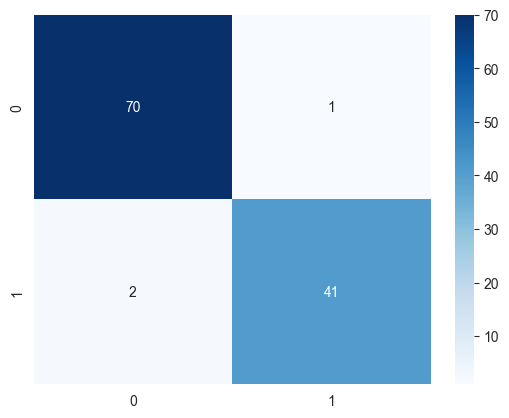

In [211]:
sns.heatmap(confusion_matrix(y_test_int , y_pred_svm , labels=[1, 0]), annot=True, cmap='Blues', fmt='g')


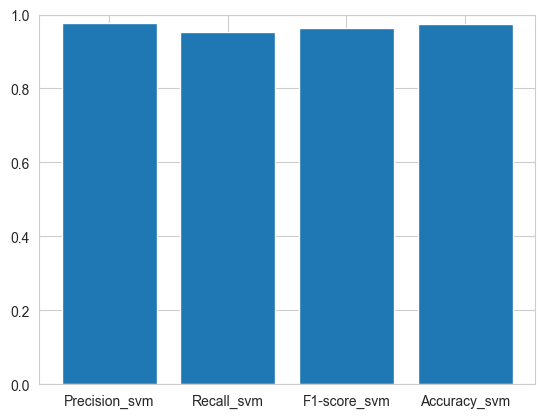

In [212]:
labels = ['Precision_svm', 'Recall_svm', 'F1-score_svm', 'Accuracy_svm']
scores = [precision_svm, recall_svm, f1_score_svm, accuracy_svm]

plt.bar(labels, scores)
plt.ylim(0, 1)
plt.show()

In [213]:
X_train, X_test, y_train, y_test = train_test_split( X_data, Y_data ,test_size=0.2, random_state=42)

accuracy_list = []

k_range = range(3,101)
# KNN 모델 생성
for i in k_range:
    # 모델 학습    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # 검증용 데이터로 예측
    y_pred_knn = knn.predict(X_test)
    
    # 모델 성능 평가
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_list.append(accuracy)
    print(f"KNN 모델의 정확도: {accuracy:.4f}")
    
best_accuracy = max(accuracy_list)
best_k = k_range[accuracy_list.index(best_accuracy)]

# 중복된 정확도 중 첫번째 k값 찾기
for i in range(accuracy_list.index(best_accuracy)):
    if accuracy_list[i] == best_accuracy:
        best_k = k_range[i]
        break


# 최고의 결과 출력
print(f"가장 높은 정확도 : {best_accuracy: .4f}")
print(f"해당 정확도의 k값: {best_k}")


KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9298
KNN 모델의 정확도: 0.9386
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9474
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9649
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561
KNN 모델의 정확도: 0.9561


In [214]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

y_test_int = y_test.astype('int')
y_pred_knn = y_pred_knn.astype('int')
tn, fp, fn, tp = confusion_matrix(y_test_int, y_pred_knn, labels=[True, False]).ravel()
precision_knn = tp / (tp + fp)
recall_knn = tp / (tp + fn)
f1_score_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)
accuracy_knn = (tp + tn) / (tp + tn + fp + fn)

print("Confusion Matrix:")
print("Precision_knn:", precision_knn)
print("Recall_knn:", recall_knn)
print("F1-score:", f1_score_knn)
print("Accuracy_knn:", accuracy_knn)

Confusion Matrix:
Precision_knn: 1.0
Recall_knn: 0.8604651162790697
F1-score: 0.9249999999999999
Accuracy_knn: 0.9473684210526315


<Axes: >

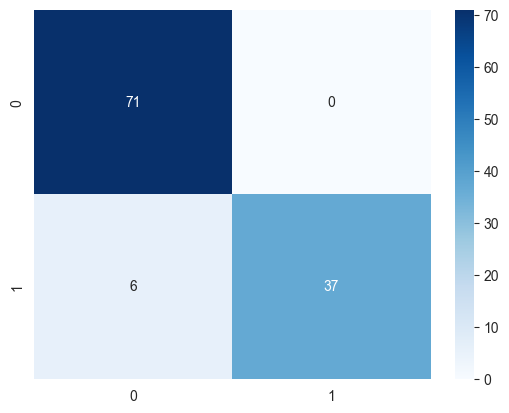

In [215]:
sns.heatmap(confusion_matrix(y_test_int, y_pred_knn, labels=[1, 0]), annot=True, cmap='Blues', fmt='g')

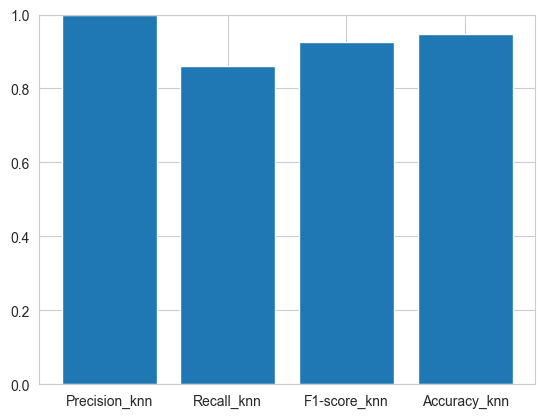

In [216]:

labels = ['Precision_knn', 'Recall_knn', 'F1-score_knn', 'Accuracy_knn']
scores = [precision_knn, recall_knn, f1_score_knn, accuracy_knn]

plt.bar(labels, scores)
plt.ylim(0, 1)
plt.show()

### knn과 svm의 'Precision_knn', 'Recall_knn', 'F1-score_knn', 'Accuracy_knn' , confusion_matrix 비교

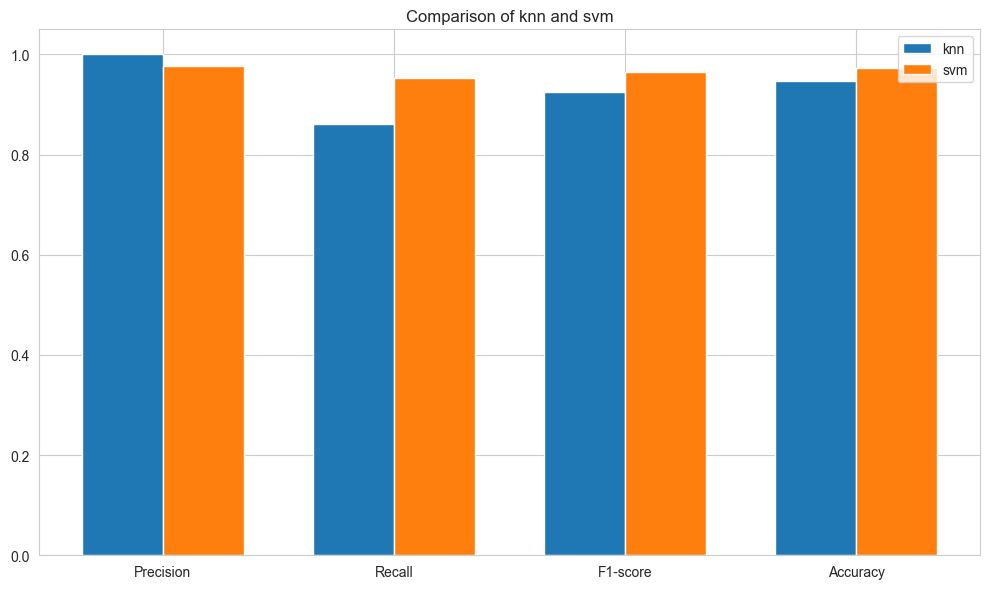

In [217]:
# 데이터 시각화
bar_width = 0.35
plt.figure(figsize=(10,6))
plt.bar(np.arange(4), [precision_knn, recall_knn, f1_score_knn, accuracy_knn], bar_width, label='knn')
plt.bar(np.arange(4) + bar_width, [precision_svm, recall_svm, f1_score_svm, accuracy_svm], bar_width, label='svm')

plt.xticks(np.arange(4) + bar_width/2, ('Precision', 'Recall', 'F1-score', 'Accuracy'))
plt.title('Comparison of knn and svm')
plt.tight_layout()
plt.legend()
plt.show()

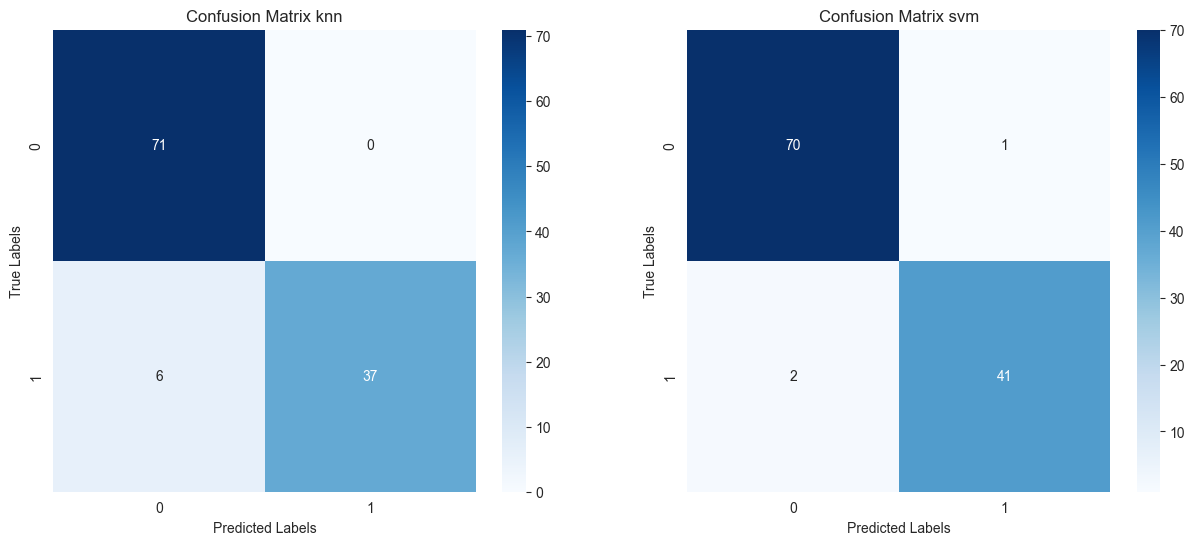

In [218]:
confusion_matrix_knn = confusion_matrix(y_test_int, y_pred_knn, labels=[1, 0])
confusion_matrix_svm = confusion_matrix(y_test_int, y_pred_svm, labels=[1, 0])

# knn과 svm의 confusion matrix 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('True Labels')
ax1.set_title('Confusion Matrix knn')


sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted Labels')
ax2.set_ylabel('True Labels')
ax2.set_title('Confusion Matrix svm')

plt.show()

### Recall, F1-score ,accuracy 그리고 TN 영역에서 아주 근소하지만 svm모델이 더 좋은 성능을 보입니다. 
### 모든 부분에서 svm이 동등하거나 좋은 경향을 보이며 svm모델의 경우 하이퍼파라미터튜닝을 더욱 진행할 수 있다는 점에서 좋은 모델인것 같습니다.

### 아래 코드는 수업시간에 배운 FNN, DNN 간단한 딥러닝 모델 구현을 해보았습니다.

In [219]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# FNN 모델 구현
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

X_train =X_train.astype('float32')
y_train = y_train.astype('float32')
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train ,test_size=0.2, random_state=42)
# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
12/12 [==============================] - 0s 7ms/step - loss: 5.4074 - accuracy: 0.4780 - val_loss: 0.7619 - val_accuracy: 0.4945
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 3.5206 - accuracy: 0.5302 - val_loss: 0.5432 - val_accuracy: 0.7802
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 3.2497 - accuracy: 0.5165 - val_loss: 0.4582 - val_accuracy: 0.8022
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 2.2000 - accuracy: 0.5989 - val_loss: 0.4092 - val_accuracy: 0.8132
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.6405 - accuracy: 0.6264 - val_loss: 0.4186 - val_accuracy: 0.8352
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.5350 - accuracy: 0.6126 - val_loss: 0.4921 - val_accuracy: 0.7363
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.3078 - accuracy: 0.6758 - val_loss: 0.4464 - val_accuracy: 0.7473
Epoch 8/100
1

3/3 [==============================] - 0s 1ms/step


<Axes: >

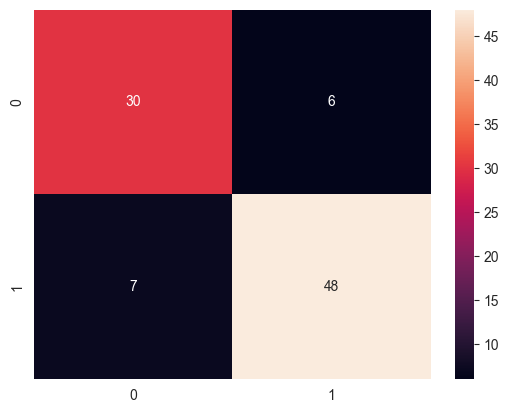

In [226]:
y_pred = model.predict(X_val)

cm = confusion_matrix(y_val, y_pred.round())
sns.heatmap(cm, annot=True)

3/3 [==============================] - 0s 500us/step


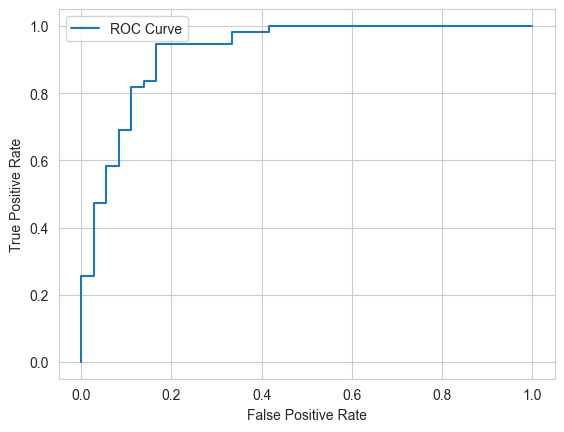

AUC: 0.9242424242424241


In [227]:
from sklearn.metrics import roc_curve, roc_auc_score

# y_score는 모델이 예측한 양성 클래스에 대한 확률
y_score = model.predict(X_val)

# fpr = False Positive Ratio , tpr = True Positive Ratio 
# fpr = FP / (FP + TN) , tpr = TP / (TP + FN)
fpr, tpr, thresholds = roc_curve(y_val, y_score)

# ROC Curve 
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# AUC score
auc = roc_auc_score(y_val, y_score)
print('AUC:', auc)

In [ ]:
pix_data

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,smoothness_worst,concavity_worst,concave points_worst
0,17.99,10.38,122.80,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,25.380,17.33,184.60,0.16220,0.7119,0.2654
1,20.57,17.77,132.90,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,24.990,23.41,158.80,0.12380,0.2416,0.1860
2,19.69,21.25,130.00,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,23.570,25.53,152.50,0.14440,0.4504,0.2430
3,11.42,20.38,77.58,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,14.910,26.50,98.87,0.20980,0.6869,0.2575
4,20.29,14.34,135.10,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,22.540,16.67,152.20,0.13740,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,25.450,26.40,166.10,0.14100,0.4107,0.2216
565,20.13,28.25,131.20,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,23.690,38.25,155.00,0.11660,0.3215,0.1628
566,16.60,28.08,108.30,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,18.980,34.12,126.70,0.11390,0.3403,0.1418
567,20.60,29.33,140.10,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,25.740,39.42,184.60,0.16500,0.9387,0.2650


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# 모델 생성
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(lr=0.001),
                  metrics=['accuracy'])

    return model


In [230]:
# input data의 normalization 전 후 비교

# basic input_data 모델 생성

basic_model = create_model(input_shape=X_train.shape[1:], num_classes=10)

# 모델 학습
history = basic_model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

# 모델 평가
score_basic = basic_model.evaluate(X_val, y_val, verbose=0)

# noramlization input_data 모델 생성
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
nor_model = create_model(input_shape=X_train_norm.shape[1:], num_classes=10)
# 모델 학습
history = nor_model.fit(X_train_norm, y_train, batch_size=32, epochs=100, validation_split=0.1)

# 모델 평가
score_nor = nor_model.evaluate(X_val_norm, y_val, verbose=0)


Epoch 1/100
11/11 [==============================] - 0s 9ms/step - loss: 17.4362 - accuracy: 0.2569 - val_loss: 0.7513 - val_accuracy: 0.5946
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 7.5858 - accuracy: 0.4740 - val_loss: 0.5688 - val_accuracy: 0.7568
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 5.9744 - accuracy: 0.5688 - val_loss: 0.7033 - val_accuracy: 0.7027
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 4.6244 - accuracy: 0.5321 - val_loss: 1.4936 - val_accuracy: 0.5135
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 3.9919 - accuracy: 0.5902 - val_loss: 0.9910 - val_accuracy: 0.5135
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 3.0251 - accuracy: 0.5719 - val_loss: 0.9105 - val_accuracy: 0.5135
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 2.2854 - accuracy: 0.6147 - val_loss: 0.5180 - val_accuracy: 0.7297
Epoch 8/100


Epoch 1/100
11/11 [==============================] - 0s 8ms/step - loss: 1.7260 - accuracy: 0.4924 - val_loss: 0.7223 - val_accuracy: 0.9459
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.9358 - val_loss: 0.2363 - val_accuracy: 0.9730
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.9572 - val_loss: 0.1232 - val_accuracy: 0.9730
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9572 - val_loss: 0.0898 - val_accuracy: 0.9730
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1409 - accuracy: 0.9633 - val_loss: 0.0802 - val_accuracy: 0.9730
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9694 - val_loss: 0.0829 - val_accuracy: 0.9459
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9633 - val_loss: 0.0766 - val_accuracy: 0.9459
Epoch 8/100
1

In [231]:
# 결과 비교
print('basic vs normalization')
print(f'Test loss:{score_basic[0]:.4f} vs {score_nor[0]:.4f}')
print(f'Test accuracy: {score_basic[1]:.4f} vs {score_nor[1]:.4f}')


basic vs normalization
Test loss:0.3568 vs 0.3642
Test accuracy: 0.8681 vs 0.9560


딥러닝 모델에서 normalization 한 후의 loss , accuracy 값이 월등히 좋아진 것을 알 수 있다.
머신러닝 모델에서도 차이가 큰지 확인해봅니다.

In [232]:
X_train, X_val, y_train, y_val = train_test_split( X_data, Y_data ,test_size=0.2, random_state=42)

accuracy_list = []

k_range = range(3,101)
# KNN 모델 생성
for i in k_range:
    # 모델 학습    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    # 검증용 데이터로 예측
    y_pred = knn.predict(X_val)
    
    # 모델 성능 평가
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)
    # print(f"KNN 모델의 정확도: {accuracy:.4f}")
    
best_accuracy = max(accuracy_list)
best_k = k_range[accuracy_list.index(best_accuracy)]

# 중복된 정확도 중 첫번째 k값 찾기
for i in range(accuracy_list.index(best_accuracy)):
    if accuracy_list[i] == best_accuracy:
        best_k = k_range[i]
        break


In [234]:
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
accuracy_list = []

k_range = range(3,101)
# KNN_nor 모델 생성
for i in k_range:
    # 모델 학습    
    knn_nor = KNeighborsClassifier(n_neighbors=i)
    knn_nor.fit(X_train_norm, y_train)

    # 검증용 데이터로 예측
    y_pred = knn_nor.predict(X_val_norm)
    
    # 모델 성능 평가
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)
    # print(f"KNN_nor 모델의 정확도: {accuracy:.4f}")
    
best_accuracy_nor = max(accuracy_list)
best_k_nor = k_range[accuracy_list.index(best_accuracy_nor)]

# 중복된 정확도 중 첫번째 k값 찾기
for i in range(accuracy_list.index(best_accuracy_nor)):
    if accuracy_list[i] == best_accuracy_nor:
        best_k_nor = k_range[i]
        break

In [235]:
#결과 비교

print("basic vs normalization ")
print(f"가장 높은 정확도 : {best_accuracy: .4f} vs {best_accuracy_nor: 0.4f}")
print(f"해당 정확도의 k값: {best_k} vs {best_k_nor}")

basic vs normalization 
가장 높은 정확도 :  0.9649 vs  0.9737
해당 정확도의 k값: 23 vs 3


In [238]:
# 상위 5개가 아닌 이상치를 통해 분리된 15개의 값에 대해 진행 
# 학습용 데이터와 검증용 데이터 분리
X_data = pix_data
Y_data = data["diagnosis"]

X_train, X_val, y_train, y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# SVM 모델 생성
svm = SVC()

# 매개 변수 범위 지정
param_grid = {'C': np.arange(300, 330, 10), # why if np.arange(300,330,10) score = 0.9737 , elif np.arange(200,330,10) score = 0.9649 ?  because overfitting issue? 
              'gamma': np.arange(0.0001, 0.001, 0.0001)}

# GridSearchCV를 이용해 최적의 매개 변수 찾기
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 매개 변수 및 정확도 출력
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

svm = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm.fit(X_train, y_train)
# 검증용 데이터로 예측
y_pred = svm.predict(X_val)

# 모델 성능 평가
accuracy = accuracy_score(y_val, y_pred)
print(f"SVM 모델의 정확도: {accuracy:.4f}")

Best parameters: {'C': 300, 'gamma': 0.00030000000000000003}
Best cross-validation score: 0.9560
SVM 모델의 정확도: 0.9737


In [239]:
# 상위 5개가 아닌 이상치를 통해 분리된 15개의 값에 대해 진행 
# 학습용 데이터와 검증용 데이터 분리
X_data = pix_data
Y_data = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)
# SVM 모델 생성
svm = SVC()

# 매개 변수 범위 지정
param_grid = {'C': np.arange(300, 330, 10), # why if np.arange(300,330,10) score = 0.9737 , elif np.arange(200,330,10) score = 0.9649 ?  because overfitting issue? 
              'gamma': np.arange(0.0001, 0.001, 0.0001)}

# GridSearchCV를 이용해 최적의 매개 변수 찾기
grid_search_nor = GridSearchCV(svm, param_grid, cv=5)
grid_search_nor.fit(X_train_norm, y_train)

# 최적의 매개 변수 및 정확도 출력
print("Best parameters: {}".format(grid_search_nor.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_nor.best_score_))

svm = SVC(C=grid_search_nor.best_params_['C'], gamma=grid_search_nor.best_params_['gamma'])
svm.fit(X_train_norm, y_train)
# 검증용 데이터로 예측
y_pred = svm.predict(X_test_norm)

# 모델 성능 평가
accuracy_nor = accuracy_score(y_test, y_pred)
print(f"SVM 모델의 정확도: {accuracy_nor:.4f}")

Best parameters: {'C': 300, 'gamma': 0.0007000000000000001}
Best cross-validation score: 0.9736
SVM 모델의 정확도: 0.9737


In [240]:
#결과 비교

print("basic vs normalization ")
print(f"Best cross-validation score: {grid_search.best_score_:0.4f} vs {grid_search_nor.best_score_:0.4f}")
print(f"가장 높은 정확도 : {accuracy: .4f} vs {accuracy_nor: 0.4f}")

basic vs normalization 
Best cross-validation score: 0.9560 vs 0.9736
가장 높은 정확도 :  0.9737 vs  0.9737


모델이 조금 더 좋아진 것을 볼 수 있다.
배치 정규화는 좋은 튜닝수단인 것 같습니다.

In [241]:
p_data = data.drop('Unnamed: 32',axis=1)

In [242]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df_temp = p_data
# 데이터 분리
y=df_temp['diagnosis']
X=df_temp.drop('diagnosis',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
dt_c = DecisionTreeClassifier( max_depth=5)
dt_r = DecisionTreeRegressor(max_depth=5)

# 모델 학습
dt_c.fit(X_train,y_train)
dt_r.fit(X_train,y_train)

# 모델 예측
y_pred_c=dt_c.predict(X_test)
y_pred_r=dt_r.predict(X_test)

# 모델 검증 mse , r2 
mse_c = mean_squared_error(y_test, y_pred_c)
r2_c = r2_score(y_test, y_pred_c)

mse_r = mean_squared_error(y_test, y_pred_r)
r2_r = r2_score(y_test, y_pred_r)
print(f"Mean Squared Error: {mse_c:.4f} vs {mse_r:.4f}")
print(f"R^2 Score: {r2_c:.4f} vs {r2_r:.4f}")

Mean Squared Error: 0.0702 vs 0.0527
R^2 Score: 0.7013 vs 0.7758


이상치 제거 데이터
Mean Squared Error: 0.0702 vs 0.0616
R^2 Score: 0.7013 vs 0.7377

전체데이터
Mean Squared Error: 0.0614 vs 0.0615
R^2 Score: 0.7386 vs 0.7384